## Training Machine Learning Models to Predict Quantum Synthesis Outcomes

### Quantum Foundry Project (UCSB)
**Authors**:
Bruno Jacob, Xianjun Yang, Mauricio Valtierra

**PIs**: Linda Petzold, Stephen Wilson

In [5]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm


### Import and prepare the data

In [6]:
# Load the data

df = pd.read_excel('./data/Synthesis_parameters_GaNb4Se8.xlsx',header=1)

In [7]:
# Drop some columns

df = df.drop(df.columns[-2:], axis=1)

In [8]:
# Append column with acceptable synthesis criteria
# E.g., in this case, we are considering a sample as
# acceptable when the amount of GaNb4Se8 is > 90%.

df["Acceptable"] = (df["GaNb4Se8"]>90).astype(int)

In [9]:
# Show first 20 elements of the dataframe

df.head(20)

,Sample ID,Ga,Nb,Se,Ga.1,Nb.1,Se.1,Temperature (C),Time (h),Heating rate (C/min),Cooling rate (C/min),GaNb4Se8,Ga-Se compound,Nb-Se compound,Acceptable
0,047#1,1.5,4,8,0.0474,0.1673,0.2857,1000,24,1,-10,92.98326,6.07696,0.939777,1
1,047#2,1.5,4,8,0.0476,0.1679,0.2853,1000,24,1,-10,93.07713,5.77365,1.149221,1
2,058#1,1.5,4,8,0.0468,0.1680,0.2850,1000,24,1,-10,24.84635,3.47488,71.678777,0
3,058#2,1.5,4,8,0.0472,0.1677,0.2849,1000,24,1,-10,50.14625,0.15420,49.699554,0
4,058#3,1.5,4,8,0.0477,0.1671,0.2855,1000,24,1,-10,83.64087,0.44397,15.915164,0
5,058#4,1.5,4,8,0.0476,0.1668,0.2857,1000,24,1,-10,88.19314,0.27189,11.534966,0
6,059#1,1.5,4,8,0.0480,0.1678,0.2848,1000,24,1,-10,94.57269,2.34468,3.082636,1
7,059#2,1.5,4,8,0.0474,0.1676,0.2851,1000,24,1,-10,92.93833,3.50064,3.561026,1
8,062#1,1.5,4,8,0.0947,0.3352,0.5702,1000,24,1,-10,88.26425,6.38091,5.354845,0
9,062#2,1.5,4,8,0.0950,0.3349,0.5700,1000,24,1,-10,92.53799,5.47468,1.987330,1


In [10]:
# Print column names

print(df.columns)

Index(['Sample ID', 'Ga', 'Nb', 'Se', 'Ga.1', 'Nb.1', 'Se.1',
       'Temperature (C)', 'Time (h)', 'Heating rate (C/min)',
       'Cooling rate (C/min) ', 'GaNb4Se8', 'Ga-Se compound', 'Nb-Se compound',
       'Acceptable'],
      dtype='object')


In [11]:
# Print number of examples in the dataset

print('Dataset contains {} examples'.format(df.shape[0]))

Dataset contains 61 examples


### Extract training and testing sets

In [12]:
# Target vector (labels): must be a one-dimensional array, with shape (n_examples , )

y = df["Acceptable"].to_numpy()
print('Shape of target vector y:',y.shape)

Shape of target vector y: (61,)


In [13]:
# Features matrix: must be of shape (n_examples, n_features)

X = df[["Ga.1","Nb.1","Se.1","Time (h)","Heating rate (C/min)"]].to_numpy()
print('Shape of features matrix X:',X.shape)

Shape of features matrix X: (61, 5)


In [14]:
# Split train and test subsets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train subset: {} samples'.format(X_train.shape[0]))
print('Test subset: {} samples'.format(X_test.shape[0]))

Train subset: 42 samples
Test subset: 19 samples


In [15]:
# Select model (e.g., Support Vector Classifier)

from sklearn import svm
model = svm.SVC()

In [16]:
# Train the model

model.fit(X_train,y_train);

In [78]:
# Compute the mean accuracy of the model for both train and test subsets

accuracy_train = np.zeros(4)
accuracy_test = np.zeros(4)

accuracy_train[0] = model.score(X_train, y_train)
accuracy_test[0] = model.score(X_test, y_test)

print("Mean accuracy (SVC) train subset: {:0.2f}%".format(accuracy_train[0]*100))
print("Mean accuracy (SVC) test subset: {:0.2f}%".format(accuracy_test[0]*100))


Mean accuracy (SVC) train subset: 83.33%
Mean accuracy (SVC) test subset: 78.95%


### Comparing with other classifiers:
*  k-nearest-neighbors
*  Decision tree
*  Logistic regression classifier

In [87]:
# Test K-Nearest-Neighbors classifier

from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(3)

model2.fit(X_train, y_train)

accuracy_train[1] = model2.score(X_train, y_train)
accuracy_test[1] = model2.score(X_test, y_test)

print("Mean accuracy (k-nearest-neighbors), train subset: {:0.2f}%".format(accuracy_train[1]*100))
print("Mean accuracy (k-nearest-neighbors), test subset: {:0.2f}%".format(accuracy_test[1]*100))


Mean accuracy (k-nearest-neighbors), train subset: 92.86%
Mean accuracy (k-nearest-neighbors), test subset: 84.21%


In [83]:
# Test decision tree classifier

from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(max_depth=5)

model3.fit(X_train, y_train)

accuracy_train[2] = model3.score(X_train, y_train)
accuracy_test[2] = model3.score(X_test, y_test)

print("Mean accuracy (decision tree) train subset: {:0.2f}%".format(accuracy_train[2]*100))
print("Mean accuracy (decision tree) test subset: {:0.2f}%".format(accuracy_test[2]*100))


Mean accuracy (decision tree) train subset: 100.00%
Mean accuracy (decision tree) test subset: 68.42%


In [91]:
# Test logistic regression classifier

from sklearn.linear_model import LogisticRegression

model4 = LogisticRegression(random_state=0)

model4.fit(X_train, y_train)

accuracy_train[3] = model4.score(X_train, y_train)
accuracy_test[3] = model4.score(X_test, y_test)

print("Mean accuracy (decision tree) train subset: {:0.2f}%".format(accuracy_train[3]*100))
print("Mean accuracy (decision tree) test subset: {:0.2f}%".format(accuracy_test[3]*100))


Mean accuracy (decision tree) train subset: 83.33%
Mean accuracy (decision tree) test subset: 78.95%


### Results

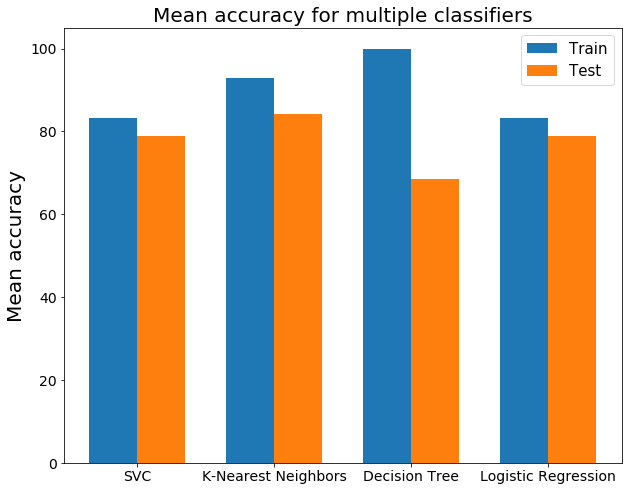

In [124]:
labels = ["SVC","K-Nearest Neighbors","Decision Tree","Logistic Regression"]

x_labels = np.arange(len(labels))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x_labels - bar_width/2, accuracy_train*100, bar_width, label='Train')
rects2 = ax.bar(x_labels + bar_width/2, accuracy_test*100, bar_width, label='Test')

ax.set_ylabel('Mean accuracy',fontsize=20)
ax.set_title('Mean accuracy for multiple classifiers',fontsize=20)
ax.set_xticks(x_labels)
ax.set_xticklabels(labels)
plt.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=15)
plt.show()
